In [1]:
from PIL import Image
import numpy as np

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]

In [3]:
img = Image.open('/content/greecy.jpg')

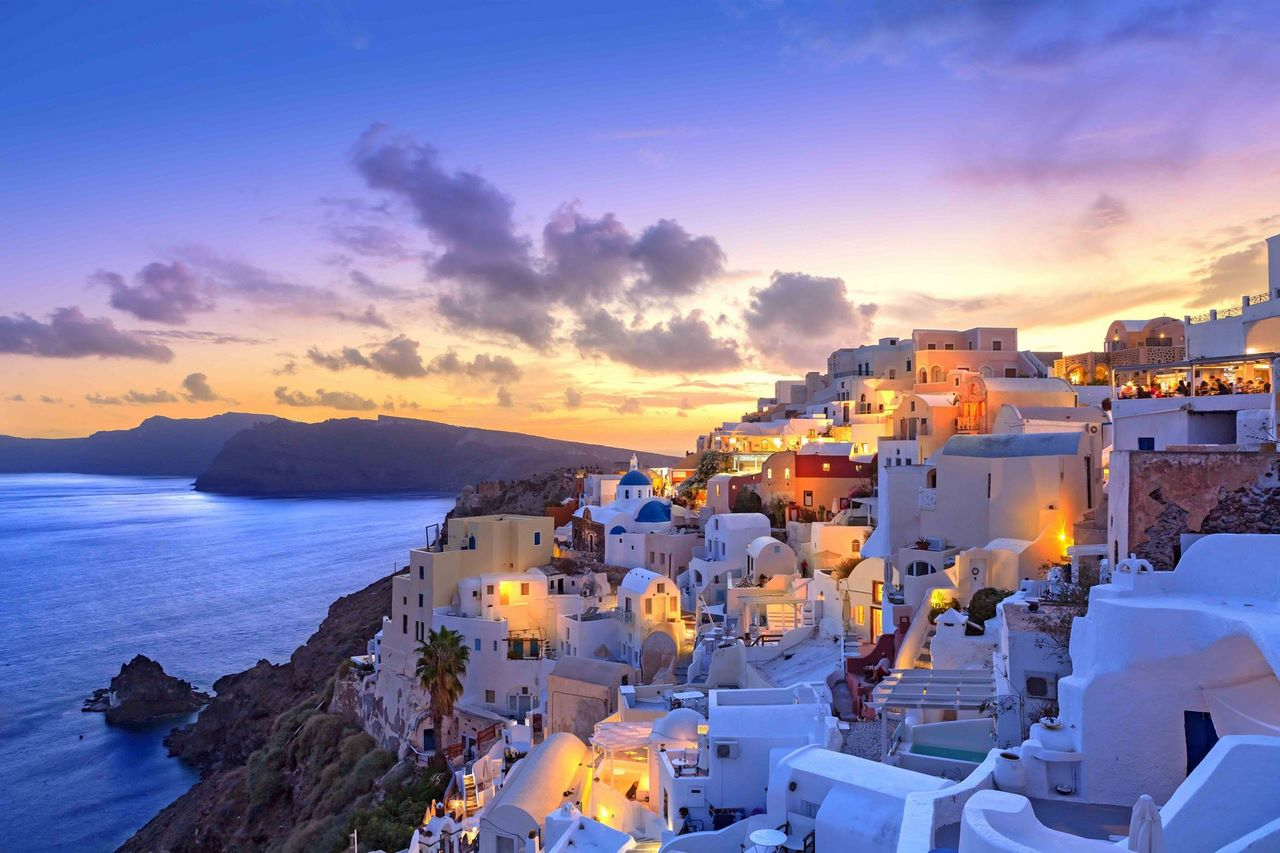

In [5]:
A = img

# Берем среднее значение по 3 каналу и получаем оттенок серого
X = np.mean(A, -1)

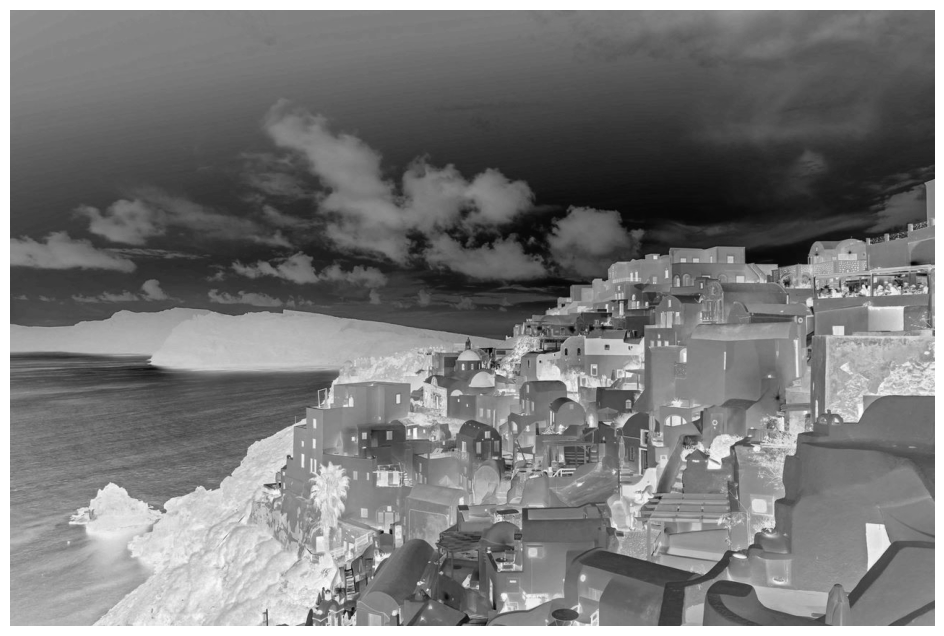

In [8]:
img = plt.imshow(256-X) # Инверсия цветов
img.set_cmap('gray')
plt.axis('off')
plt.show()

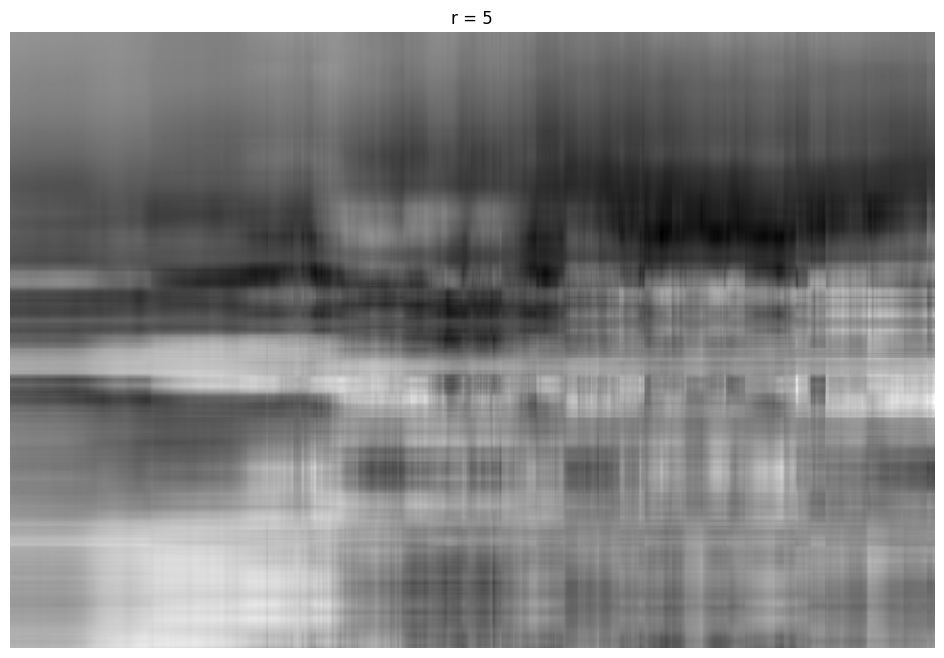

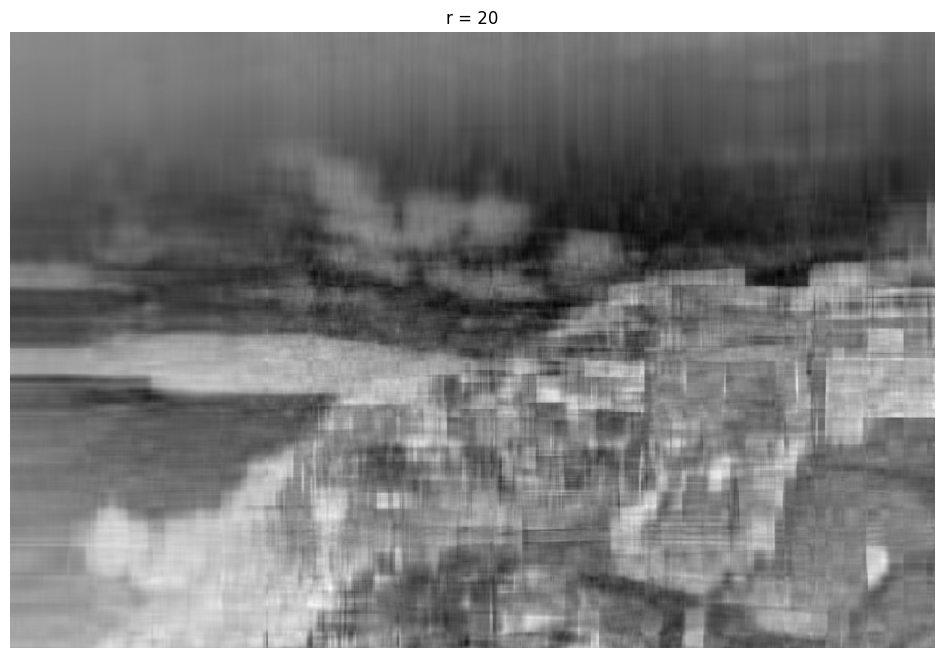

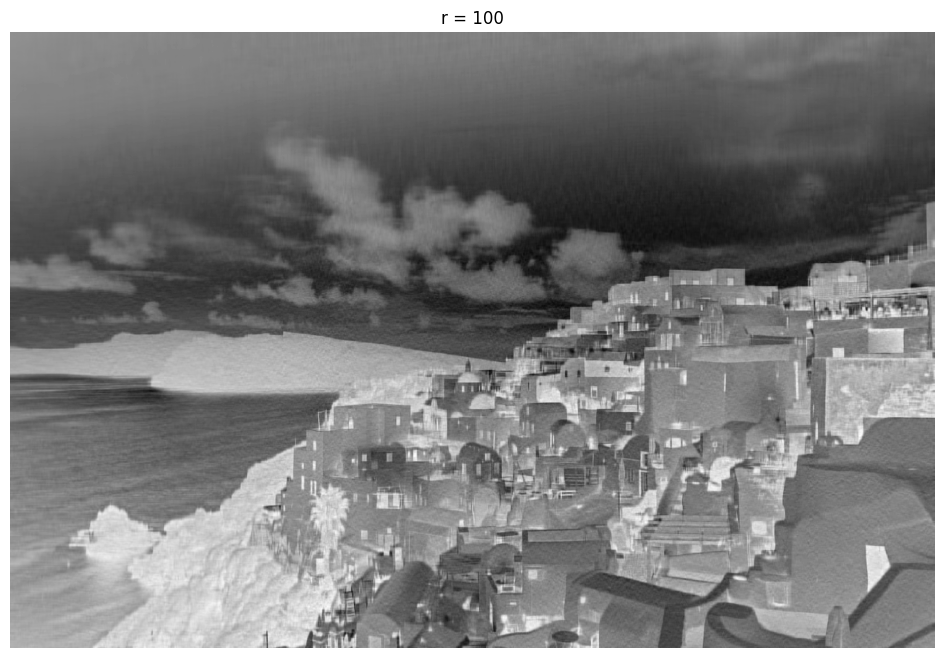

In [11]:
U, S, V = np.linalg.svd(X, full_matrices=False) # Возвращаем не матрицу размера nxn, а первые m столбцов
S = np.diag(S) # Извлекаем диагональные сингулярные значения

j = 0
# Матричные аппроксимации
for r in (5, 20, 100): # Ранги
  Xapprox = U[:, :r] @ S[0:r, :r] @ V[:r, :]
  plt.figure(j+1)
  j += 1
  img = plt.imshow(256 - Xapprox)
  img.set_cmap('gray')
  plt.axis('off')
  plt.title('r = ' + str(r))
  plt.show()

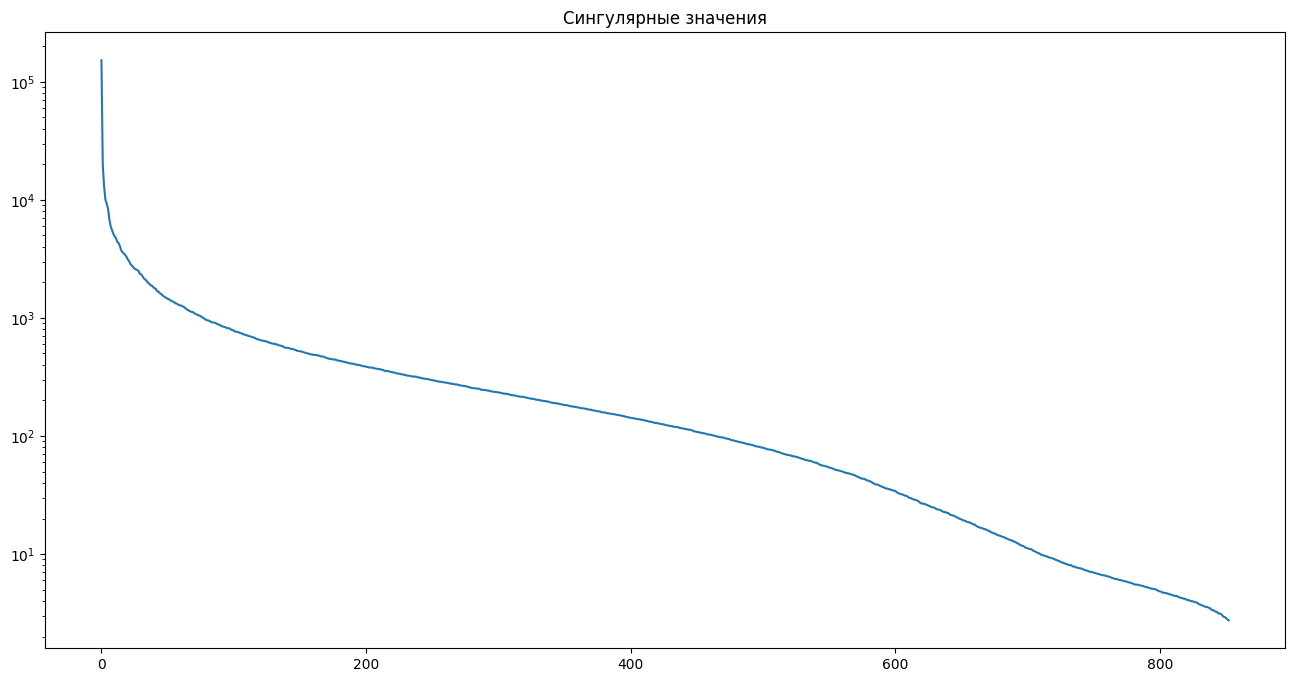

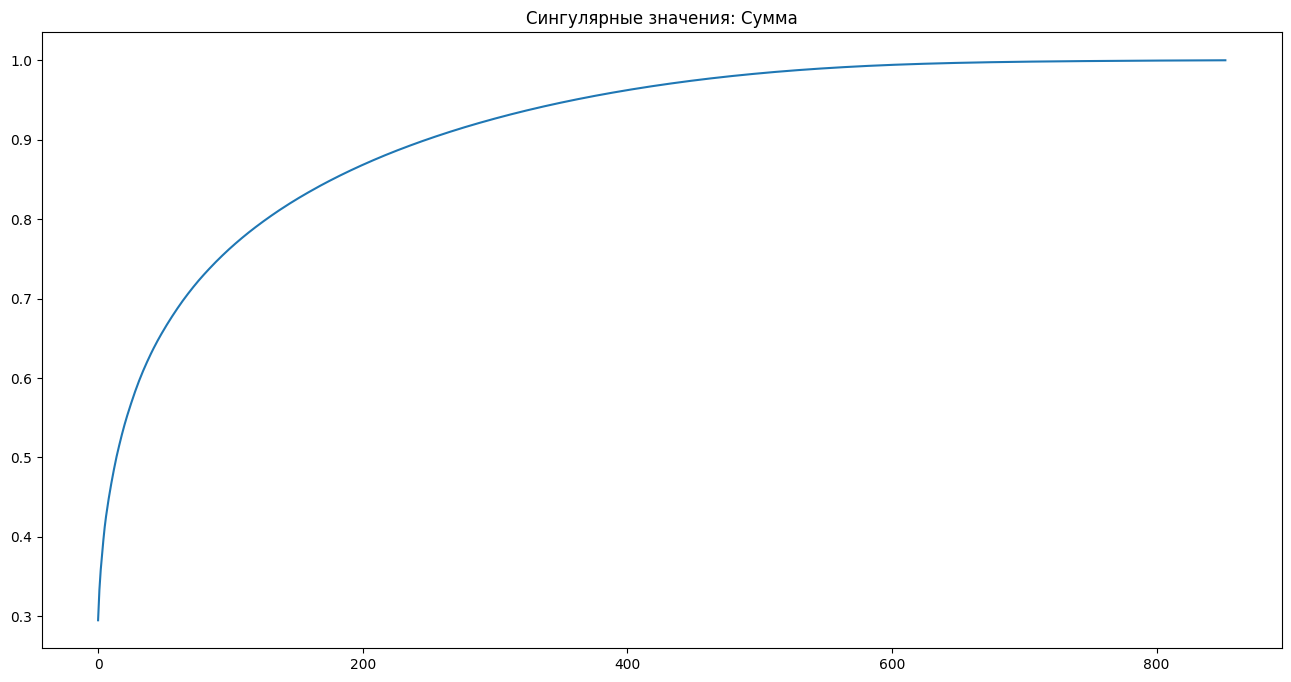

In [13]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Сингулярные значения')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Сингулярные значения: Сумма')
plt.show()